In [1]:
import numpy as np
import matplotlib.pyplot as plt
import legwork as lw
import astropy.units as u
from scipy.interpolate import interp1d
from astropy.cosmology import Planck18, z_at_value
from scipy.integrate import trapezoid
import paths
import deepdish as dd
from schwimmbad import MultiPool
import tqdm
import utils
import paths

In [2]:


plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 12

# update various fontsizes to match
params = {'figure.figsize': (6,4),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.7 * fs,
          'ytick.labelsize': 0.7 * fs}
plt.rcParams.update(params)


# set up the LISA frequency grid
f_LISA = np.logspace(-1, -5, 500) * u.Hz

# set up the LIGO eccentricity range
e_LIGO = np.logspace(-6, -3, 15)
e_LIGO = np.append(0, e_LIGO)
e_LIGO_round = np.array([f"{e:.2e}" for e in e_LIGO])


# get the mass, mass ratio, and rate grids
down_samp_fac=50
mass_1, mass_ratio, M1, Q, dN_dm1dqdVcdt = utils.get_LIGO_rate(down_samp_fac=down_samp_fac)

mass_1 = mass_1
mass_ratio = mass_ratio
MM, QQ, EE_LIGO, FF = np.meshgrid(mass_1, mass_ratio, e_LIGO, f_LISA, indexing='ij')

In [6]:
#
#
#dat_in = list(zip(EE_LIGO.flatten(), FF.flatten(), MM.flatten(), QQ.flatten()*MM.flatten()))
#
#with MultiPool(processes=96) as pool:
#    dat_out = list(tqdm.tqdm(pool.imap(utils.get_e_LISA_t_LIGO, dat_in), total=len(dat_in)))
#    
#EE_LISA, TT_LIGO = zip(*dat_out)
#
#EE_LISA = np.array(EE_LISA).reshape(FF.shape)
#TT_LIGO = np.array(TT_LIGO).reshape(FF.shape) * u.yr
#
#np.save(paths.data / 't_merge', TT_LIGO.value)
#np.save(paths.data / 'e_LISA', EE_LISA)
#

In [4]:
TT_LIGO = np.load(paths.data / 't_merge.npy')*u.Gpc
EE_LISA = np.load(paths.data / 'e_LISA.npy')

In [5]:
#snr_thresh = 12
#dat_in = list(zip(MM.flatten(), QQ.flatten(), EE_LISA.flatten(), FF.flatten(), snr_thresh * np.ones(len(MM.flatten()))))
#with MultiPool(processes=92) as pool:
#    dat_out = list(tqdm.tqdm(pool.imap(utils.get_Vc_Dh, dat_in), total=len(dat_in)))
#    
#DH, VC = zip(*dat_out)
#DH = np.array(DH).reshape(QQ.shape) * u.Gpc
#VC = np.array(VC).reshape(QQ.shape) * u.Gpc**3
#
#np.save(paths.data / 'comoving_volume', VC.value)
#np.save(paths.data / 'horizon_distance', DH.value)
#
#

In [18]:
VC = np.load(paths.data / 'comoving_volume.npy')*u.Gpc**3
DH = np.load(paths.data / 'horizon_distance.npy')*u.Gpc

In [19]:
dT_LIGO_df_LISA = utils.dTmerger_df(MM, QQ*MM, FF, EE_LISA).to(u.yr / u.Hz)


In [20]:
mass_1

<Quantity [ 2.        ,  6.9049049 , 11.80980981, 16.71471471, 21.61961962,
           26.52452452, 31.42942943, 36.33433433, 41.23923924, 46.14414414,
           51.04904905, 55.95395395, 60.85885886, 65.76376376, 70.66866867,
           75.57357357, 80.47847848, 85.38338338, 90.28828829, 95.19319319] solMass>

In [21]:
mass_ratio

array([0.1       , 0.19018036, 0.28036072, 0.37054108, 0.46072144,
       0.5509018 , 0.64108216, 0.73126253, 0.82144289, 0.91162325])

In [22]:
np.shape(DH)

(20, 10, 16, 500)

(1e-05, 2.1193863733625924)

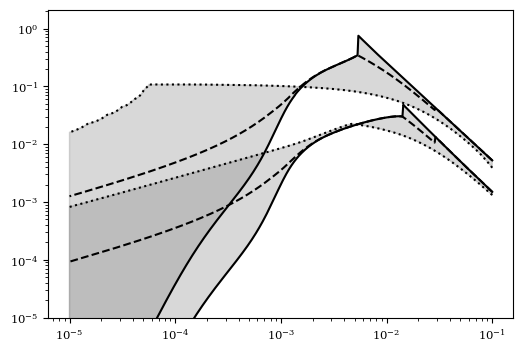

In [31]:
ind_m_10 = 2
ind_m_35 = 7
ind_m_80 = 16
ind_q05 = 4
ind_q09 = 9
ind_circ = 0
ind_ecc_mid = 7
ind_ecc_high = 15

plt.plot(f_LISA.value, DH[ind_m_10,ind_q09,ind_circ,:].value, ls='-', color='black')
plt.plot(f_LISA.value, DH[ind_m_10,ind_q09,ind_ecc_mid,:].value, ls='--', color='black')
plt.plot(f_LISA.value, DH[ind_m_10,ind_q09,ind_ecc_high,:].value, ls=':', color='black')
plt.fill_between(f_LISA.value, DH[ind_m_10,ind_q09,ind_circ,:].value, DH[ind_m_10,ind_q09,ind_ecc_high,:].value, color='grey', alpha=0.3)

plt.plot(f_LISA.value, DH[ind_m_80,ind_q05,ind_circ,:].value, ls='-', color='black')
plt.plot(f_LISA.value, DH[ind_m_80,ind_q05,ind_ecc_mid,:].value, ls='--', color='black')
plt.plot(f_LISA.value, DH[ind_m_80,ind_q05,ind_ecc_high,:].value, ls=':', color='black')
plt.fill_between(f_LISA.value, DH[ind_m_80,ind_q05,ind_circ,:].value, DH[ind_m_80,ind_q05,ind_ecc_high,:].value, color='grey', alpha=0.3)

plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-5)